# Flight Price:

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have? 

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("flight_price.xlsx")

In [3]:
df.shape

(10683, 11)

In [4]:
cols = len(df.columns)
cols

11

rows = 10683

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [5]:
import matplotlib.pyplot as plt

# Check column names to find the price column
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

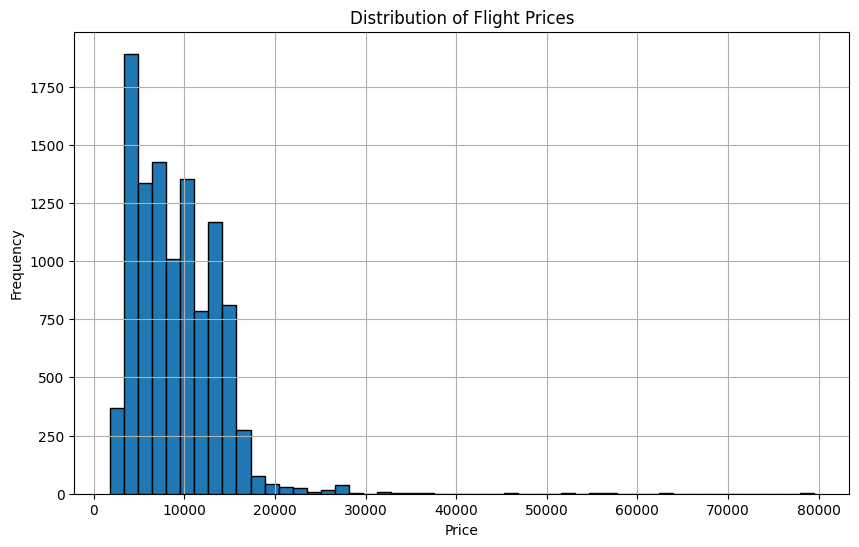

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Price'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- A histogram shows a right-skewed distribution.

- Most flight prices are clustered between Re.5,000 and Rs.10,000.

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [7]:
min_price = df['Price'].min()
max_price = df['Price'].max()

print("Minimum Price:", min_price)
print("Maximum Price:", max_price)

Minimum Price: 1759
Maximum Price: 79512


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

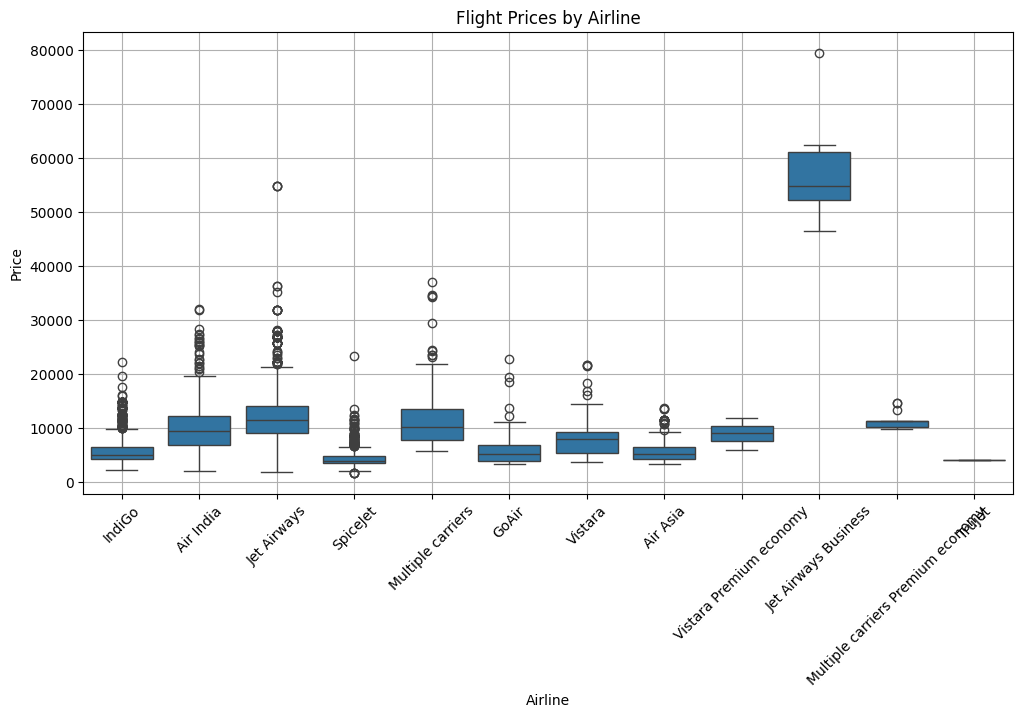

In [8]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Price')
plt.xticks(rotation=45)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

In [9]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Number of Outliers:", outliers.shape[0])


Number of Outliers: 94


### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

C:\Users\wwwsu\AppData\Local\Temp\ipykernel_21536\3749496322.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')


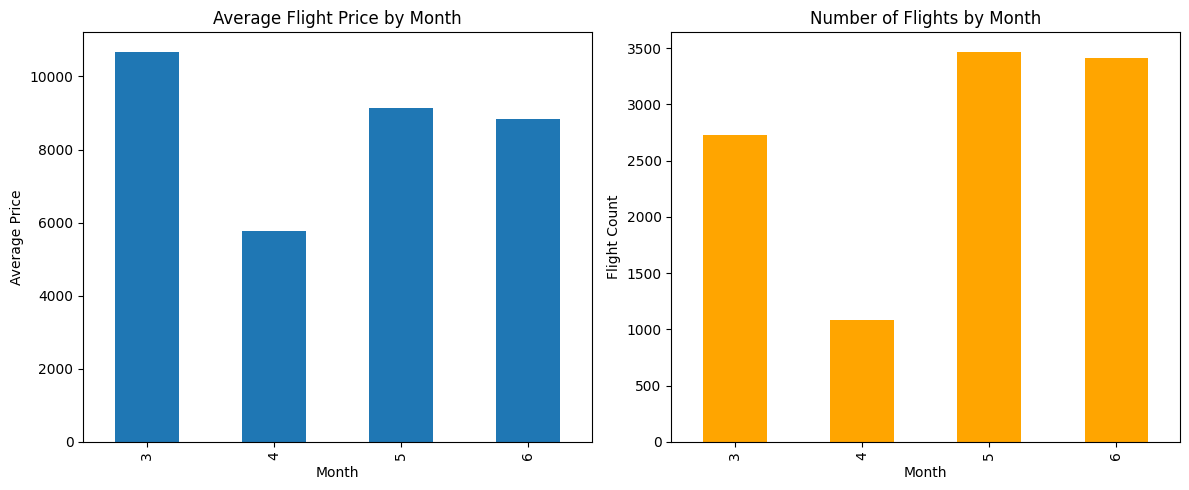

In [10]:
# Convert and extract journey month
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], errors='coerce')
df['Journey_Month'] = df['Date_of_Journey'].dt.month

# Group and plot
monthly_avg_price = df.groupby('Journey_Month')['Price'].mean()
monthly_flight_count = df['Journey_Month'].value_counts().sort_index()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
monthly_avg_price.plot(kind='bar')
plt.title('Average Flight Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

plt.subplot(1, 2, 2)
monthly_flight_count.plot(kind='bar', color='orange')
plt.title('Number of Flights by Month')
plt.xlabel('Month')
plt.ylabel('Flight Count')

plt.tight_layout()
plt.show()


### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

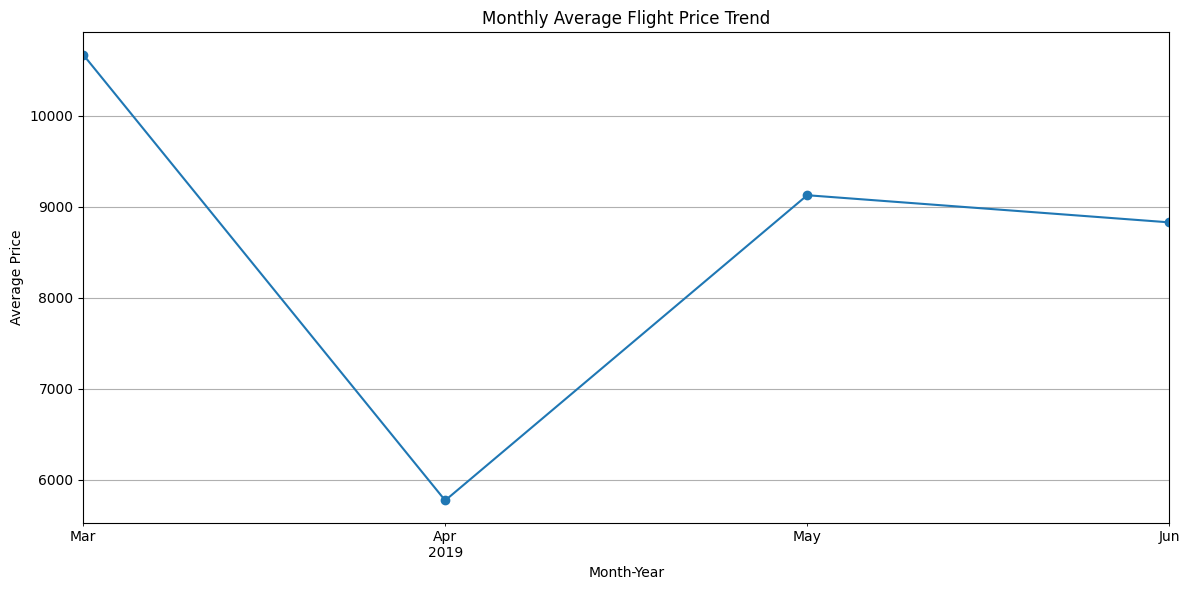

In [11]:
# Create Month-Year column
df['Month_Year'] = df['Date_of_Journey'].dt.to_period('M')

# Group and plot
monthly_trend = df.groupby('Month_Year')['Price'].mean()

plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o')
plt.title('Monthly Average Flight Price Trend')
plt.xlabel('Month-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

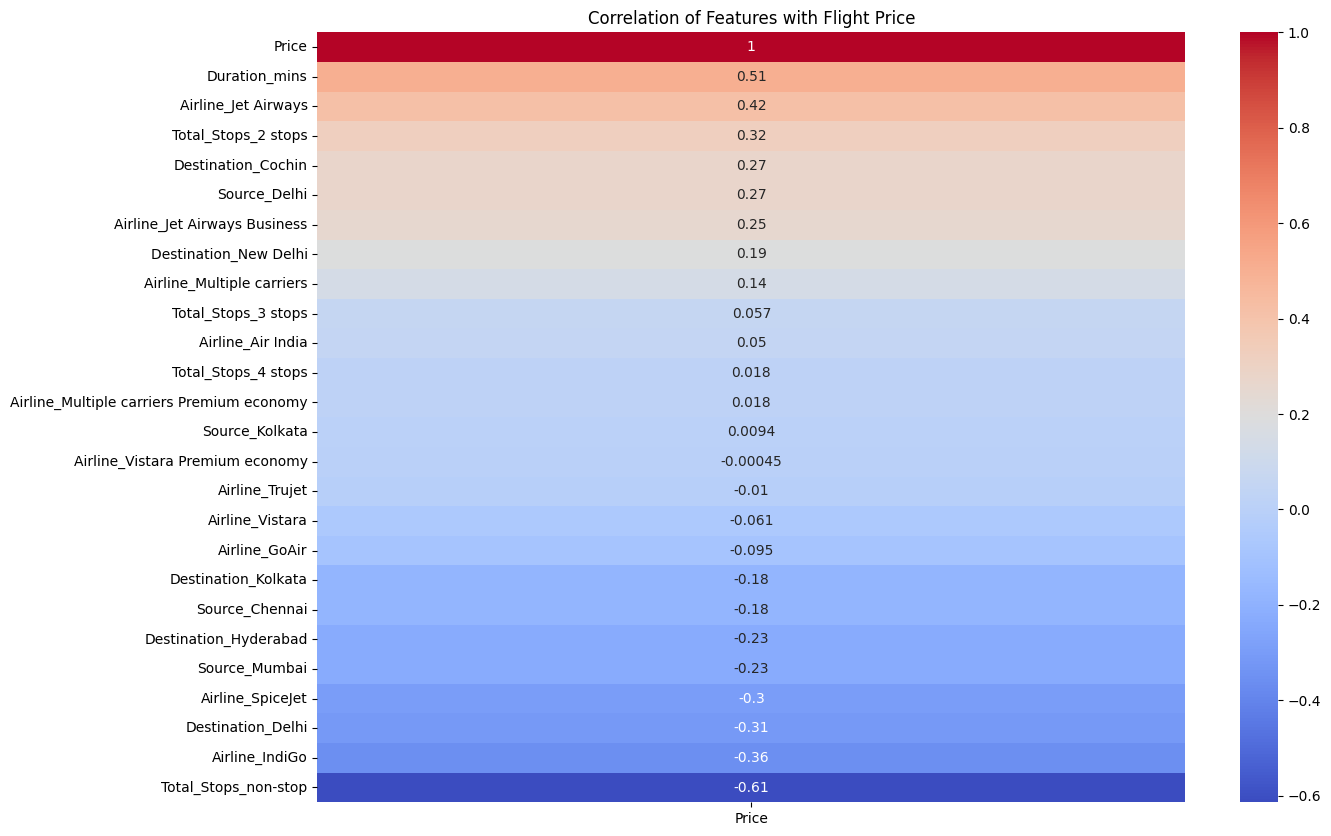

In [12]:
# Convert duration to minutes
def duration_to_minutes(duration):
    if pd.isnull(duration):
        return None
    parts = duration.strip().replace('h', 'h ').replace('m', 'm ').split()
    minutes = 0
    for part in parts:
        if 'h' in part:
            minutes += int(part.replace('h', '')) * 60
        elif 'm' in part:
            minutes += int(part.replace('m', ''))
    return minutes

df['Duration_mins'] = df['Duration'].apply(duration_to_minutes)

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination', 'Total_Stops'], drop_first=True)

# Correlation matrix with Price
correlation_matrix = df_encoded[['Price', 'Duration_mins'] + 
                                 [col for col in df_encoded.columns if 'Airline_' in col or 
                                  'Source_' in col or 'Destination_' in col or 
                                  'Total_Stops_' in col]].corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix[['Price']].sort_values(by='Price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Flight Price')
plt.show()


# Google Playstore:

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [15]:
df.shape

(10841, 13)

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.

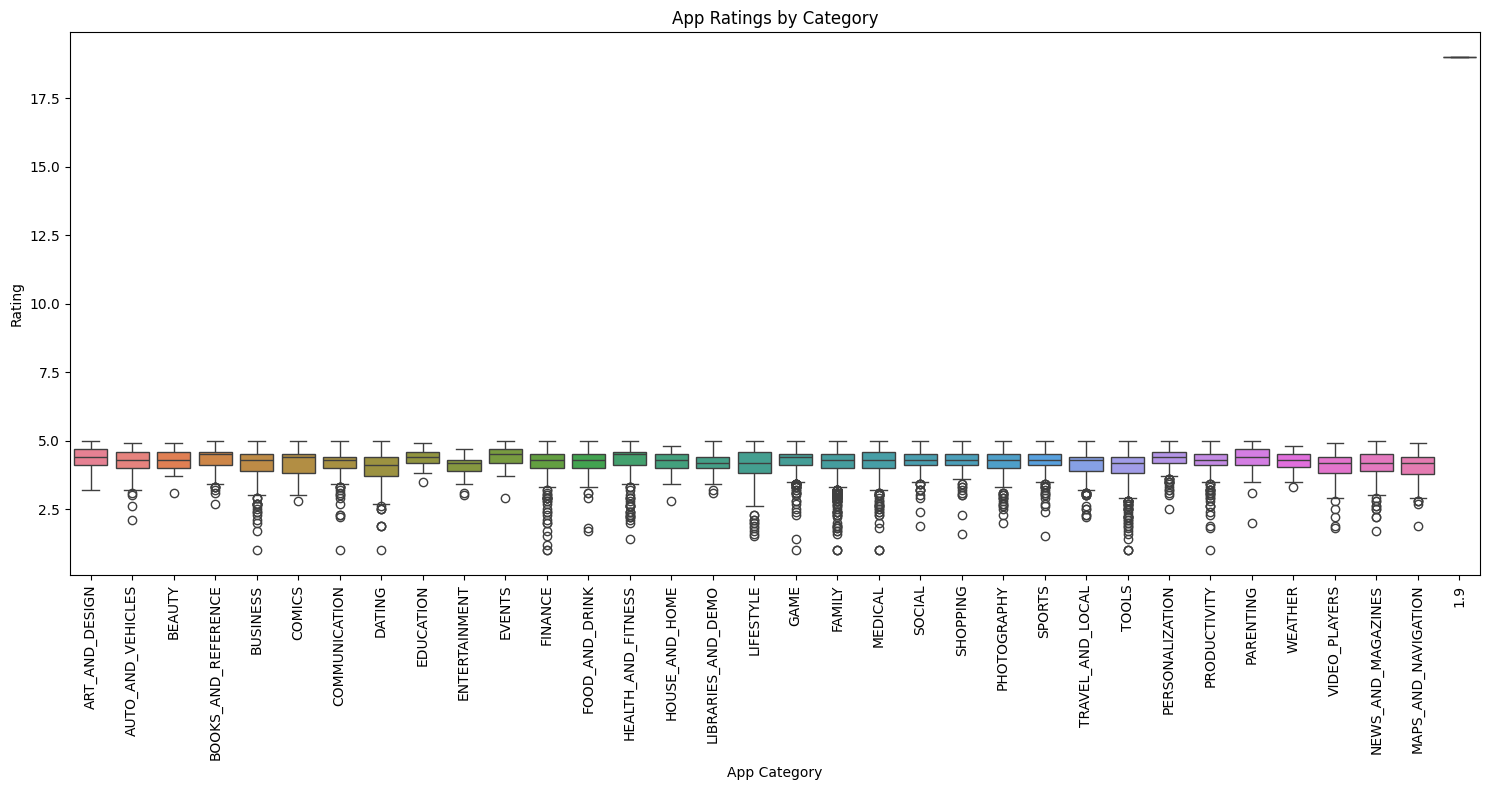

In [16]:
# Q10: Boxplot of ratings by category
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='Category', y='Rating', hue = "Category")
plt.xticks(rotation=90)
plt.title('App Ratings by Category')
plt.xlabel('App Category')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.

In [17]:
# Q11: Identify missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

Rating            1474
Type                 1
Content Rating       1
Current Ver          8
Android Ver          3
dtype: int64

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.

    - Rating: 1,474 missing values

    - Type: 1 missing value

    - Content Rating: 1 missing value

    - Current Ver: 8 missing values

    - Android Ver: 3 missing values

Impact on Analysis:

    - Missing ratings can skew analysis related to app performance or user satisfaction.

    - Missing Type affects understanding whether the app is free or paid.

    - Incomplete version information may hinder technical compatibility studies.

    - It's advisable to either impute or drop these missing rows depending on analysis needs.

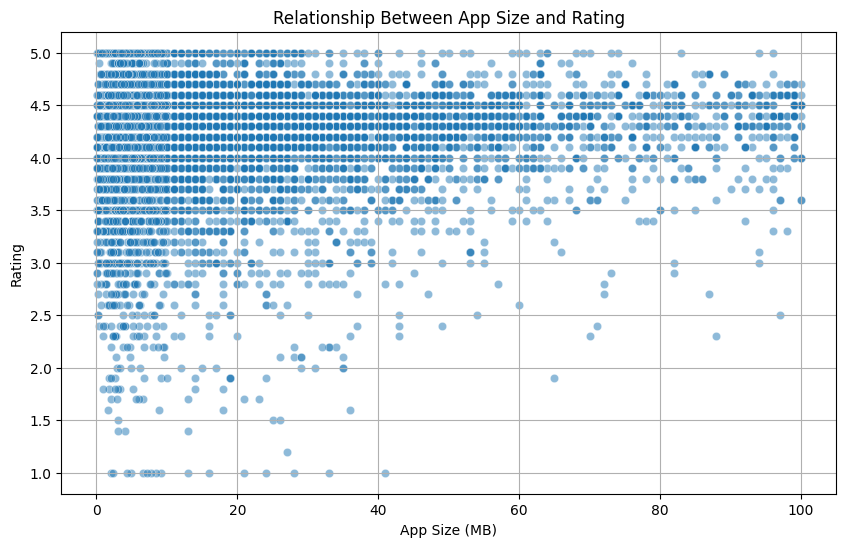

In [18]:
# Clean and prepare 'Size' column for analysis
import numpy as np

def convert_size(size_str):
    if pd.isna(size_str) or size_str == 'Varies with device':
        return np.nan
    if size_str.endswith('M'):
        return float(size_str[:-1])
    if size_str.endswith('k'):
        return float(size_str[:-1]) / 1024  # Convert kilobytes to megabytes
    return np.nan

df['Size_MB'] = df['Size'].apply(convert_size)

# Q12: Scatter plot of app size vs rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Size_MB', y='Rating', alpha=0.5)
plt.title('Relationship Between App Size and Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

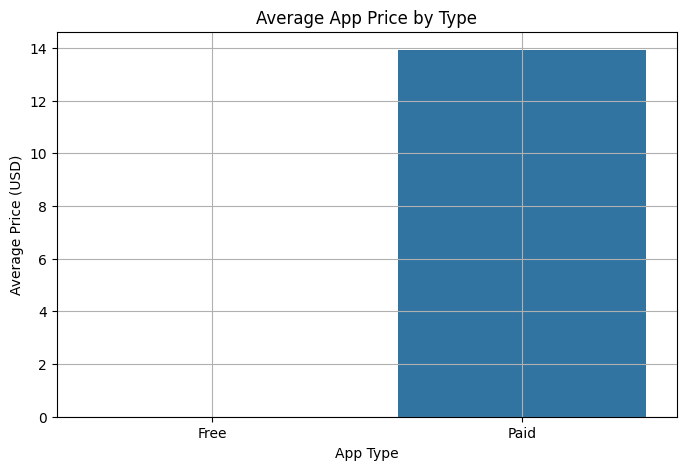

In [19]:

# Remove rows where 'Price' column has non-numeric values like 'Everyone'
df_cleaned = df[df['Price'].str.contains('^[\$\d.]+$', regex=True)]

# Convert 'Price' column to float after removing '$'
df_cleaned['Price'] = df_cleaned['Price'].str.replace('$', '', regex=False).astype(float)

# Q13: Bar chart of average prices by app type
avg_price_by_type = df_cleaned.groupby('Type')['Price'].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_price_by_type.index, y=avg_price_by_type.values)
plt.title('Average App Price by Type')
plt.xlabel('App Type')
plt.ylabel('Average Price (USD)')
plt.grid(True)
plt.show()


### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.

In [24]:
# Use pandas styling or display as table
import pandas as pd
from IPython.display import display

display(top_10_apps)


,App,Installs
3896,Subway Surfers,1.000000e+09
3943,Facebook,1.000000e+09
335,Messenger – Text and Video Chat for Free,1.000000e+09
3523,Google Drive,1.000000e+09
2884,Google Photos,1.000000e+09
3665,YouTube,1.000000e+09
4234,Skype - free IM & video calls,1.000000e+09
3687,Google Play Movies & TV,1.000000e+09
4153,Hangouts,1.000000e+09
4150,Google,1.000000e+09


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

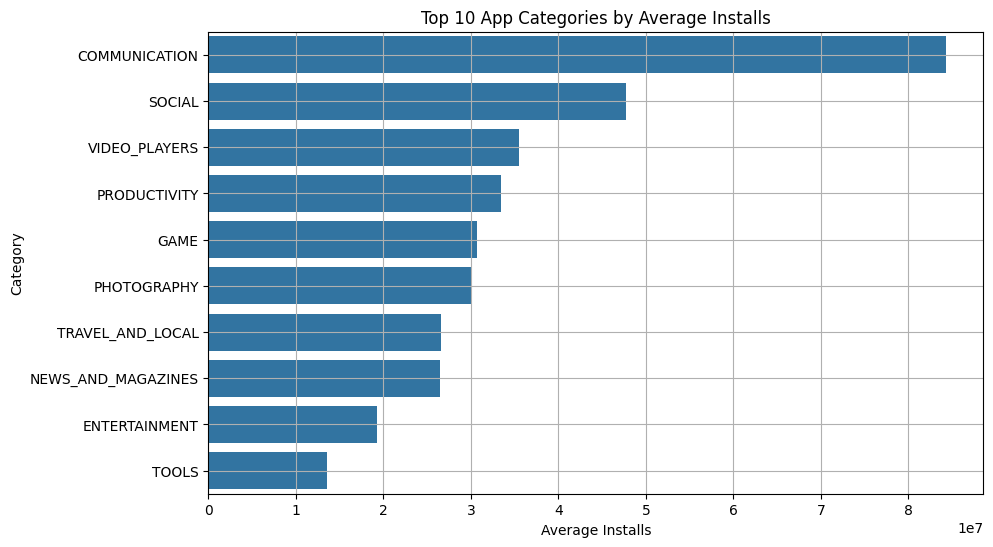

In [23]:
# Q15: Analyze popular categories by average installs
category_installs = df[['Category', 'Installs']].dropna()
popular_categories = category_installs.groupby('Category')['Installs'].mean().sort_values(ascending=False)

# Top 10 categories with highest average installs
top_categories = popular_categories.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 App Categories by Average Installs')
plt.xlabel('Average Installs')
plt.ylabel('Category')
plt.grid(True)
plt.show()


### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

In [26]:
# Group by Developer (if column exists)
dev_summary = df.groupby('App').agg({
    'Rating': 'mean',
    'Installs': 'sum',
    'Type': 'count'
}).sort_values(by='Installs', ascending=False)


In [27]:
dev_summary

,Rating,Installs,Type
App,,,
Subway Surfers,4.5,6.000000e+09,6
Google Photos,4.5,4.000000e+09,4
Instagram,4.5,4.000000e+09,4
Hangouts,4.0,4.000000e+09,4
Google News,3.9,4.000000e+09,4
...,...,...,...
AP Series Solution Pro,NaN,0.000000e+00,1
cronometra-br,NaN,0.000000e+00,1
Sweden Newspapers,NaN,0.000000e+00,1


### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

<Axes: xlabel='Month'>

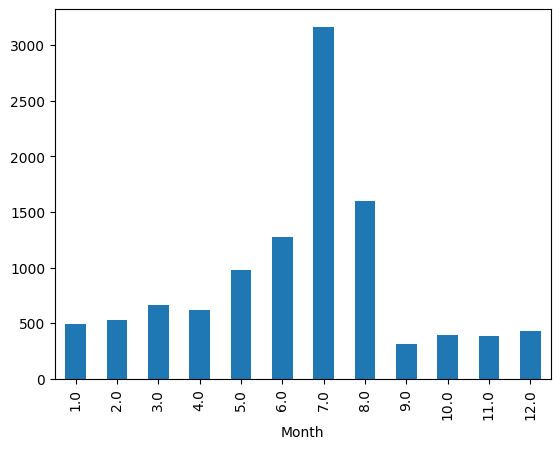

In [28]:
# Convert Last Updated to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df['Month'] = df['Last Updated'].dt.month

# Visualize number of launches by month
df['Month'].value_counts().sort_index().plot(kind='bar')
